In [2]:
import pytesseract
from datasets import load_dataset
from utils import Utils
from llm_resources.llm_engine import LLMEngine
from drawing_resources.boxer import Boxer

True

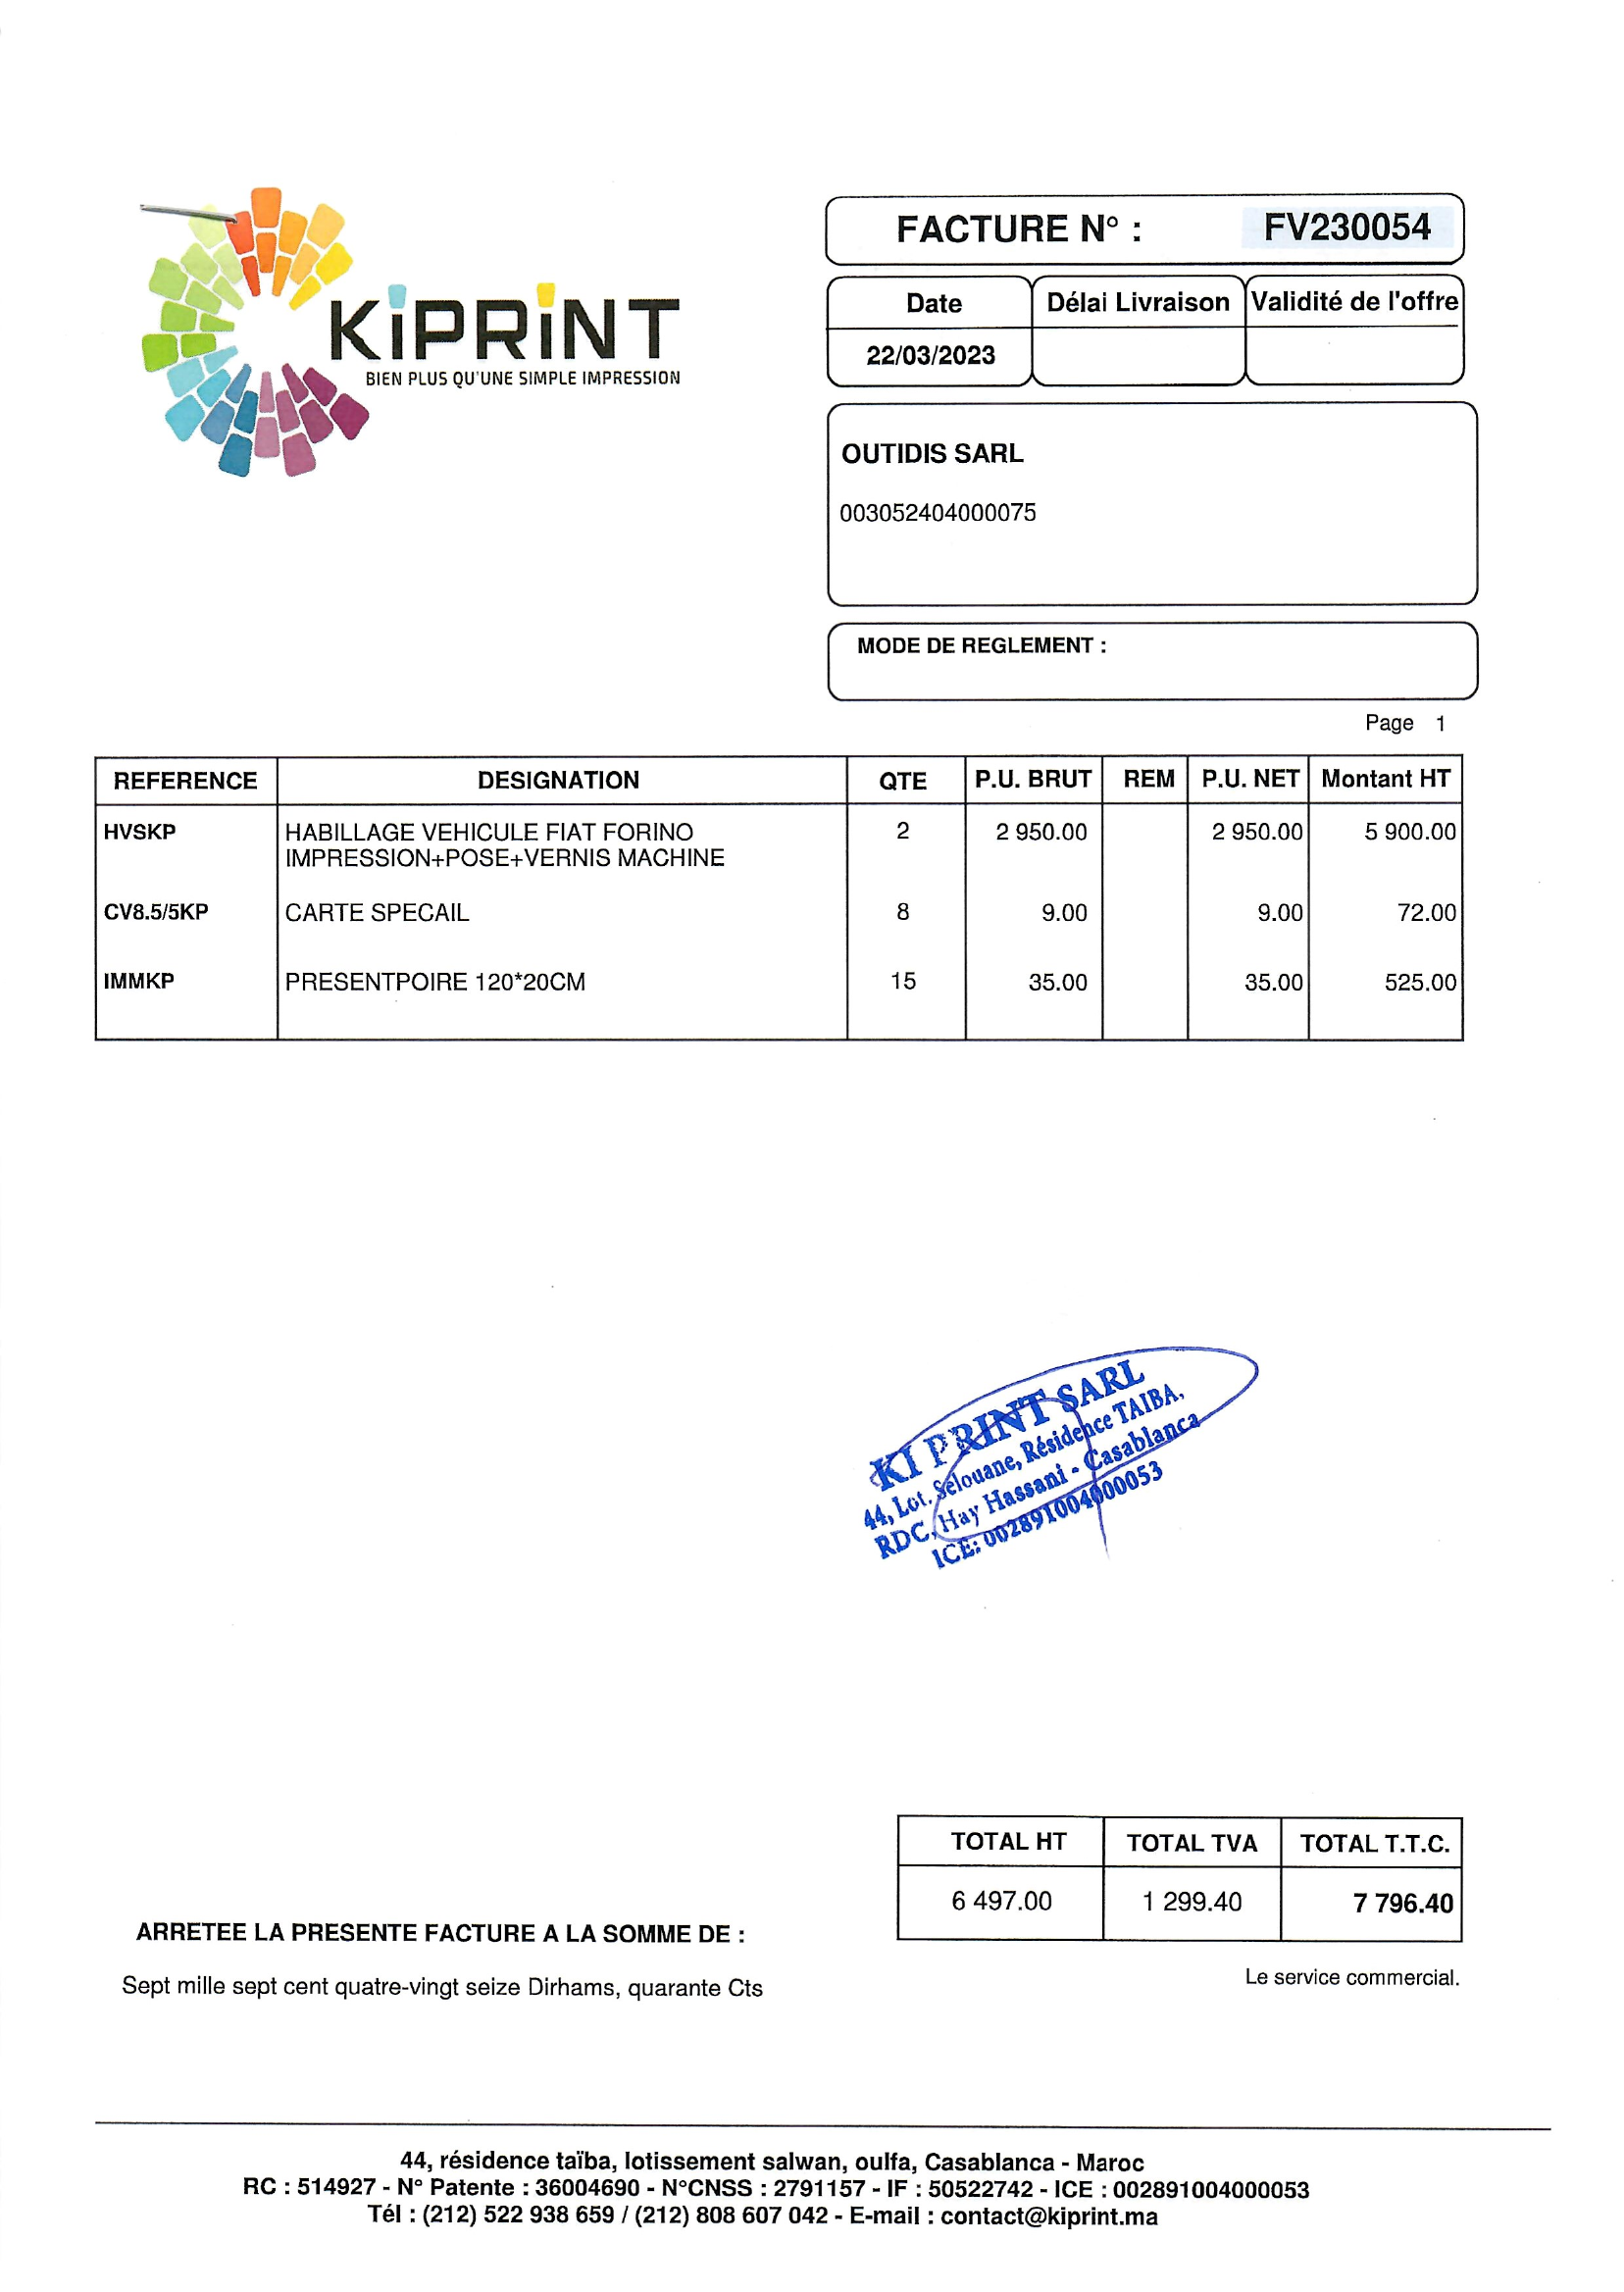

In [9]:
dataset = load_dataset("ayoub999/dataset_for_orange_factures")
example = dataset['test'][2]['image']

ocr_data = pytesseract.image_to_data(example, lang='fra', output_type=pytesseract.Output.DICT)

words = ocr_data['text']
boxes = [
    [
        ocr_data['left'][i],
        ocr_data['top'][i],
        ocr_data['left'][i] + ocr_data['width'][i],
        ocr_data['top'][i] + ocr_data['height'][i],
    ]
    for i in range(len(ocr_data['text']))
]

In [21]:
llm = LLMEngine("mixtral")
response = Utils.query_to_dict(llm.ocr_to_llm(words))

In [16]:
data2boxes = Boxer.data2boxes(response, words, boxes)
boxed_image = Boxer.box_all(example, data2boxes)

{'Nom de lentreprise': [859, 452, 965, 473],
 ' N° de facture': [1291, 217, 1459, 245],
 ' Date de facture': [884, 352, 1015, 372],
 ' Délai de livraison': [92, 767, 289, 778],
 ' Validité de loffre': [92, 767, 289, 778],
 ' ICE': [1135, 2224, 1335, 2242],
 ' N° CNSS': [789, 2222, 882, 2240],
 ' N° Patente': [546, 2222, 652, 2239],
 ' RC': [304, 2221, 383, 2238],
 ' Adresse': [450, 2192, 560, 2212],
 ' Téléphone': [432, 2248, 485, 2271],
 ' E-mail': [960, 2250, 1180, 2273],
 ' Montant HT': [993, 1928, 1072, 1948],
 ' TVA': [1187, 1928, 1266, 1949],
 ' Total TTC': [1187, 1928, 1266, 1949],
 ' Mode de règlement': [92, 767, 289, 778],
 ' Référence': [107, 840, 179, 856],
 ' Produit': [293, 865, 622, 884],
 ' Marque': [558, 839, 608, 857],
 ' Modèle': [616, 839, 707, 857],
 ' Caractéristiques': [486, 991, 596, 1010],
 ' Prix unitaire brut': [1036, 839, 1108, 857],
 ' Remise': [1063, 921, 1108, 939],
 ' Prix unitaire net': [1050, 992, 1108, 1010],
 '': [92, 767, 289, 778]}